In [ ]:
Name:G.Rishik Reddy
Reg.No:BL.EN.U4AIE23109
Lab-05

In [ ]:
1. If your project deals with a regression problem, please use one attribute of your dataset 
(X_train) along with the target values (y_train) for training a linear regression model. Sample code 
suggested below. 
from sklearn.linear_model import LinearRegression 
reg = LinearRegression().fit(X_train, y_train) 
y_train_pred = reg.predict(X_train)

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

df = pd.read_csv(r"C:\Users\rishi\PycharmProjects\ML-Lab3\Iris.csv")

X_train = df.iloc[:, [1]]
y_train = df.iloc[:, 3]

model = LinearRegression().fit(X_train, y_train)

y_train_pred = model.predict(X_train)

y_train_class = (y_train > y_train.mean()).astype(int)
y_pred_class = (y_train_pred > y_train.mean()).astype(int)

print("\nClassification Report:")
print(classification_report(y_train_class, y_pred_class))



Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        57
           1       1.00      0.75      0.86        93

    accuracy                           0.85       150
   macro avg       0.86      0.88      0.85       150
weighted avg       0.89      0.85      0.85       150



In [ ]:
2. Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1.  
Perform prediction on the test data and compare the metric values between train and test set. 

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"C:\Users\rishi\PycharmProjects\ML-Lab3\Iris.csv")

X = df.iloc[:, [1]]
y = df.iloc[:, 3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

def evaluate_model(y_true, y_pred, dataset_type="Train"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"\n{dataset_type} Set Performance Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R² Score: {r2:.4f}")

evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_test, y_test_pred, "Test")



Train Set Performance Metrics:
Mean Squared Error (MSE): 0.7805
Root Mean Squared Error (RMSE): 0.8835
Mean Absolute Percentage Error (MAPE): 28.73%
R² Score: 0.7434

Test Set Performance Metrics:
Mean Squared Error (MSE): 0.5965
Root Mean Squared Error (RMSE): 0.7723
Mean Absolute Percentage Error (MAPE): 25.79%
R² Score: 0.8180


In [ ]:
 3.Repeat the exercises A1 and A2 with more than one attribute or all attributes. 


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(r"C:\Users\rishi\PycharmProjects\ML-Lab3\Iris.csv")

X = df.iloc[:, :-3]
y = df.iloc[:, -2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

def evaluate_model(y_true, y_pred, dataset_type="Train"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"\n{dataset_type} Set Performance Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R² Score: {r2:.4f}")

evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_test, y_test_pred, "Test")



Train Set Performance Metrics:
Mean Squared Error (MSE): 0.0785
Root Mean Squared Error (RMSE): 0.2801
Mean Absolute Percentage Error (MAPE): 42.64%
R² Score: 0.8606

Test Set Performance Metrics:
Mean Squared Error (MSE): 0.0456
Root Mean Squared Error (RMSE): 0.2135
Mean Absolute Percentage Error (MAPE): 31.20%
R² Score: 0.9283


In [ ]:
4.Perform k-means clustering on your data. Please remove / ignore the target variable for 
performing clustering. Sample code suggested below. 
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2, random_state=0, 
n_init="auto").fit(X_train)  
kmeans.labels_ 
kmeans.cluster_centers_

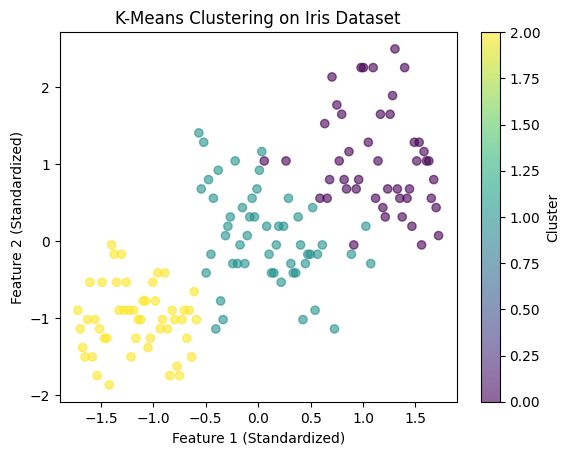

Cluster Centers:
 [[ 1.14317894  1.03542672 -0.07079946  1.04224753  1.09269889]
 [ 0.07560189  0.03894137 -0.73184462  0.30676007  0.21508647]
 [-1.1547262  -1.01457897  0.84230679 -1.30487835 -1.25512862]]


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

file_path = r"C:\Users\rishi\PycharmProjects\ML-Lab3\Iris.csv"
df = pd.read_csv(file_path)

X = df.iloc[:, :-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('K-Means Clustering on Iris Dataset')
plt.colorbar(label="Cluster")
plt.show()

print("Cluster Centers:\n", kmeans.cluster_centers_)


In [ ]:
5. For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index. 

Silhouette Score: 0.4529
Calinski-Harabasz Score: 237.8420
Davies-Bouldin Index: 0.8966


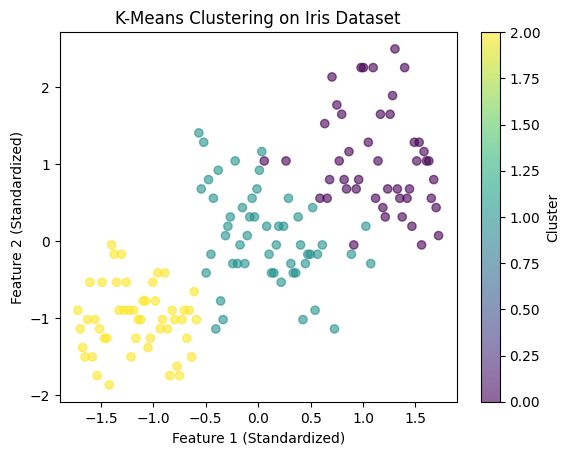

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

file_path = r"C:\Users\rishi\PycharmProjects\ML-Lab3\Iris.csv"
df = pd.read_csv(file_path)

X = df.iloc[:, :-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = labels

silhouette = silhouette_score(X_scaled, labels)
ch_score = calinski_harabasz_score(X_scaled, labels)
db_index = davies_bouldin_score(X_scaled, labels)

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {ch_score:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('K-Means Clustering on Iris Dataset')
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
6.Perform k-means clustering for different values of k. Evaluate the above scores for each k value. 
Make a plot of the values against the k value to determine the optimal cluster count. 

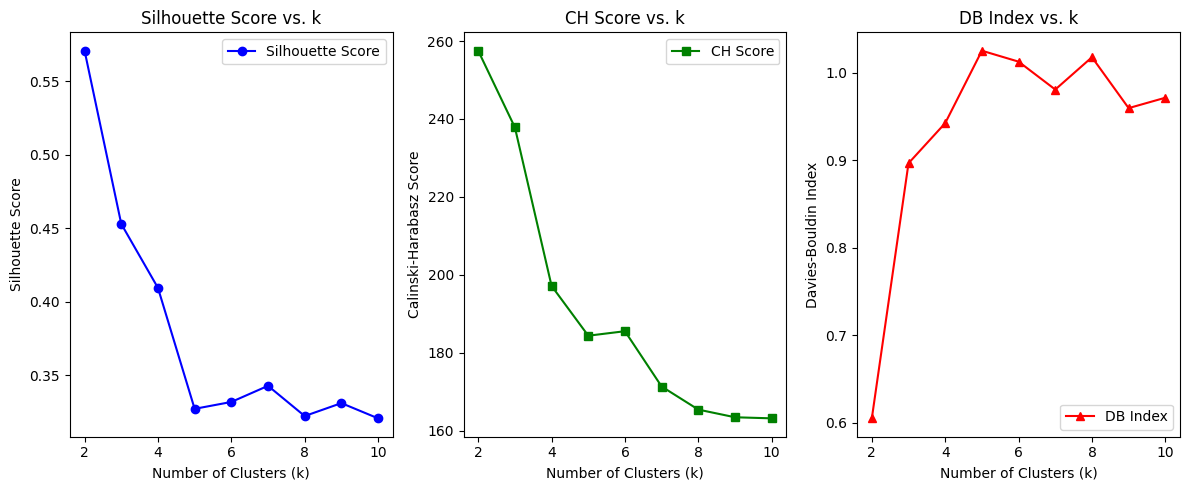

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


file_path = r"C:\Users\rishi\PycharmProjects\ML-Lab3\Iris.csv"
df = pd.read_csv(file_path)


X = df.iloc[:, :-1]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


k_values = range(2, 11)  # Testing for k = 2 to 10
silhouette_scores = []
ch_scores = []
db_scores = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)


    silhouette_scores.append(silhouette_score(X_scaled, labels))
    ch_scores.append(calinski_harabasz_score(X_scaled, labels))
    db_scores.append(davies_bouldin_score(X_scaled, labels))


plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b', label="Silhouette Score")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. k')
plt.legend()


plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='s', linestyle='-', color='g', label="CH Score")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('CH Score vs. k')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='^', linestyle='-', color='r', label="DB Index")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('DB Index vs. k')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
7. Using elbow plot, determine the optimal k value for k-means clustering. Use below code. 
for k in range(2, 20):  
kmeans = KMeans(n_clusters=k).fit(X_train) 
distorsions.append(kmeans.inertia_) 
plot(distortions) 

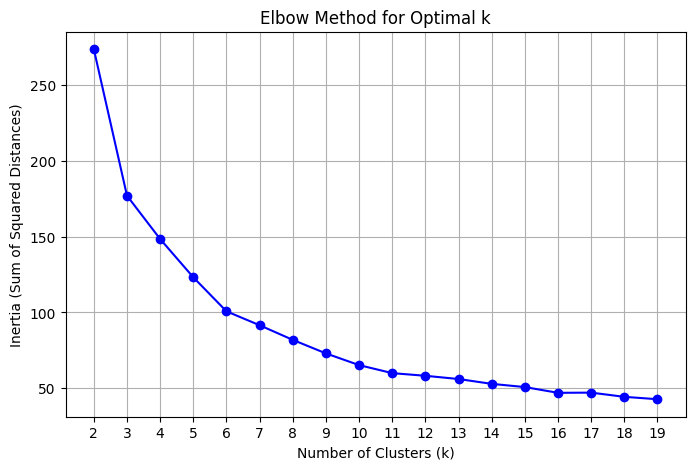

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

file_path = r"C:\Users\rishi\PycharmProjects\ML-Lab3\Iris.csv"
df = pd.read_csv(file_path)

X = df.iloc[:, :-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

distortions = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), distortions, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(2, 20))
plt.grid(True)
plt.show()
